###Lukas Mosser

##Derivation of vertical Fracture infinite conductivity solution from greens functions

$$I(y)=\frac{1}{2\sqrt{\pi \eta_{y} t}}exp(-\frac{(y-y_{w})^2}{4\eta_{y}t})$$

$$II(x)=\frac{1}{2}[erf\frac{\frac{x_{f}}{2}+(x-x_{w})}{2\sqrt{\eta_{x} t}}+erf\frac{\frac{x_{f}}{2}-(x-x_{w})}{2\sqrt{\eta_{x} t}}]$$

$$S(x,y,z,t)=II(y)I(x)$$
$$S(x,y,z,t)=\frac{1}{2}[erf\frac{\frac{y_{f}}{2}+(x-x_{w})}{2\sqrt{\eta t}}+erf\frac{\frac{y_{f}}{2}-(y-y_{w})}{2\sqrt{\eta t}}]* \\ \frac{1}{2\sqrt{\pi \eta t}}exp(-\frac{(x-x_{w})^2}{4\eta t})$$

$$S(x,y,z,t)=\frac{1}{2\sqrt{\pi \eta t}}[erf\frac{y_{f}}{4\sqrt{\eta t}}]$$

$$S(x,y,z,t)=\frac{1}{2 y_{f}\sqrt{\pi}\sqrt{\tau_{D}}}[erf\frac{1}{4\sqrt{\tau_{D}}}]$$

$$x_{D} = \frac{x}{x_{e}}, \ y_{D} = \frac{y}{y_{e}}, \ z_{D} = \frac{z}{z_{e}}$$
$$z_{e}=h, \ z_{w} = \frac{1}{2}h, \ x_{w}=y_{w}=0, \ x_{f}=L=10h, \ \frac{k_{x,y}}{k_{z}} = 10$$

$$x=y=0, \ z=r_{w}$$

$$\Delta P(M, t) = \frac{1}{\phi c_{t}}\int_0^t q(\tau)\left \{\frac{1}{2 y_{f}\sqrt{\pi}\sqrt{\tau_{D}}}[erf\frac{1}{4\sqrt{\tau_{D}}}]\right \} d\tau$$

$$\tau_{DA}=\frac{\eta \tau}{y_{f}^2}$$

Performing a change of variables:
$$\frac{d\tau_{DA}}{d\tau}=\frac{\eta}{y_{f}^2}$$
and therefore 
$$d\tau = \frac{y_{f}^2}{\eta} d\tau_{DA}$$
We change the limit of integration as:
$$\tau_{DA}(t)=\frac{\eta t}{y_{f}^2}= t_{DA}$$

Performing the change of variables:

$$\Delta P(M, t) = \frac{y_{f}^2}{2 \eta y_{f}\sqrt{\pi}\phi c_{t}}\int_0^{t_{DA}} q(\tau)\left \{\frac{1}{\sqrt{\tau_{D}}}[erf\frac{1}{4\sqrt{\tau_{D}}}]\right \} d\tau_{D}$$

Defining dimensionless pressure as
$$P_{D}(z_{D}, t_{D}) = \frac{2\pi k y_{f}}{q_{w} \mu}\Delta P(z_{D}, t_{DA})$$

We arrive at the final expression for the dimensionless pressure of a vertical fracture in an infinite reservoir with out wellbore storage and skin:
$$\Delta P(M, t_{DA}) = \frac{\sqrt{\pi} k y_{f}^2}{q_{w}\mu \eta\phi c_{t}}\int_0^{t_{DA}} q(\tau)\left \{\frac{1}{\sqrt{\tau_{D}}}[erf\frac{1}{4\sqrt{\tau_{D}}}]\right \}d\tau_{D}$$

$$\Delta P(M, t_{DA}) = \frac{\sqrt{\pi}y_{f}^2}{q_{w}}\int_0^{t_{DA}} q(\tau)\left \{\frac{1}{\sqrt{\tau_{D}}}[erf\frac{1}{4\sqrt{\tau_{D}}}]\right \}d\tau_{D}$$

$$q_{w}=y_{f}hq$$

$$\Delta P(M, t_{DA}) = \sqrt{\pi}\int_0^{t_{DA}}\left \{\frac{1}{\sqrt{\tau_{D}}}[erf\frac{1}{4\sqrt{\tau_{D}}}]\right \} d\tau_{D}$$

###This homework is incomplete

In [2]:
from scipy.integrate import trapz, quad, cumtrapz
from scipy.special import erf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
def inf_sum_term(n, tau_da, z_D):
    return np.exp(-1*n**2*np.pi**2*tau_da/10.)*np.cos(np.pi/2.*n)*np.cos(n*np.pi*z_D)

def inf_sum(N, tau_da, z_D):
    a = 0.
    for n in range(1, N+1):
        #print n, inf_sum_term(n, tau_da, z_D)
        a += inf_sum_term(n, tau_da, z_D)
    return a   
        
def inf_sum_error(e, tau_da, z_D):
    a0 = inf_sum(1, tau_da, z_D)
    for i in range(2, 10000, 2):
        a1 = inf_sum(i, tau_da, z_D)
        if np.abs(a1-a0)<=e:
            return a1
        a0=a1      
    
def source_function(x):
    a = 1./np.sqrt(x)
    b = erf(0.5*a)
    return np.sqrt(np.pi)/2.*a*b

def P_D(t_Ds):
    source_function_vals = [source_function(t_DA) for t_DA in tDs]
    y_int = cumtrapz(source_function_vals, tDs, initial=tDs[0])#, initial=source_function(tDs[0]))
    return y_int, source_function_vals

$$h[\frac{g(x_{0})}{2}+\sum_{j=1}^{m}g(x_{j})+\frac{g(x_{m+1})}{2}]$$
$$h = \frac{(b-a)}{m+1}$$
$$x_{j}=a+jh \ for \ j=0,1,2,3,4...,m,m+1$$

In [4]:
def x_j(a, j, h):
    return a+j*h

def sum_g(func, a, m):
    x = 0.
    for j in range(0, m+1):
        x += func(x_j(a, j, m))
    return x

def trapez(func, a, b, m, h, x0):
    return h*(func(x0)/2.+sum_g(func, a, m)+func(x_j(a, m+1, h))/2.)

In [5]:
a = 1e-7
b = 1.1e-7
m = 1
h = (b-a)/(m+1)

In [6]:
exponents = [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2]
lowers = np.linspace(1, 9, 100)

tDs = []
for exponent in exponents:
    for lower in lowers:
        tDs.append(float(str(lower)+'e'+str(exponent)))
print len(tDs)
p, source = P_D(tDs)

1100


In [7]:
actual_data = pd.read_excel("solution_ex9.xls", sheetname="Sheet1", header=0, skiprows=1)

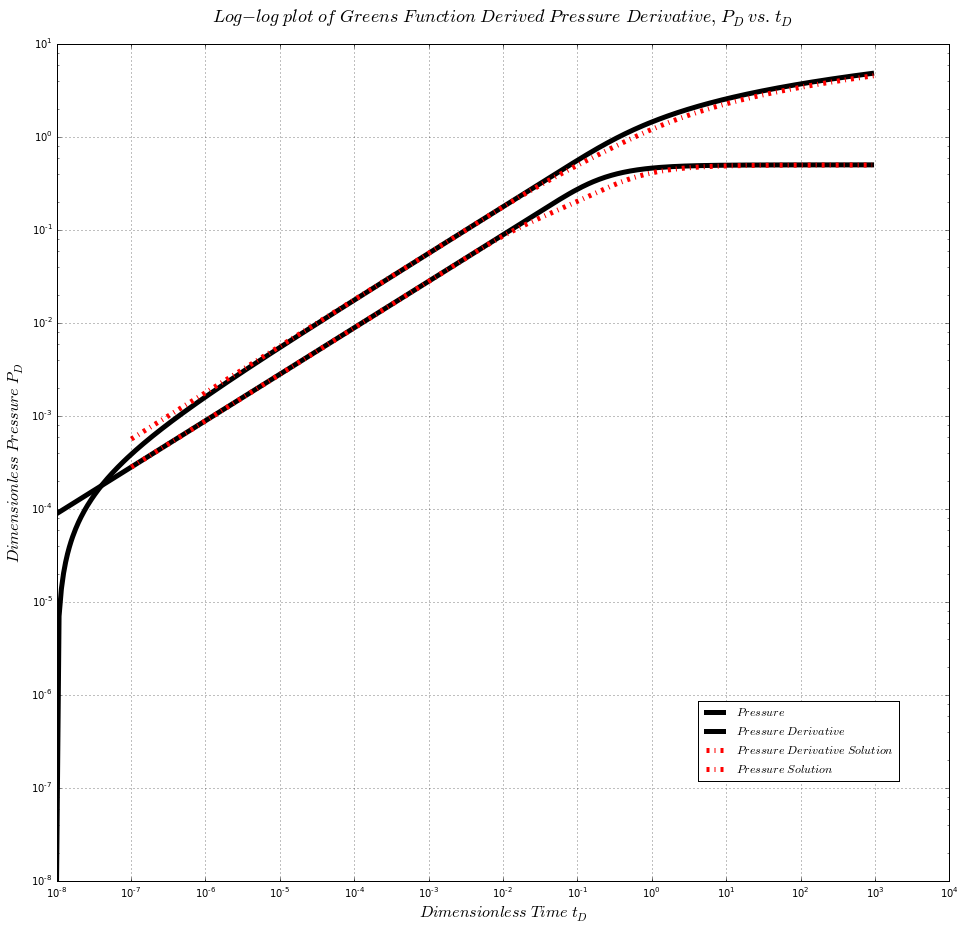

In [8]:
fig, ax = plt.subplots(figsize=(16,15))

ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
#ax.set_xlim(left=1e-1,right=1.0e6)
#ax.set_ylim(bottom=1e-2, top=1e2)

ax.set_title(r'$Log-log \ plot \ of \ Greens \ Function \ Derived \ Pressure \ Derivative, \ P_{D} \ vs. \ t_{D}$', fontsize=18, y=1.02)

ax.set_xlabel(r'$Dimensionless \ Time \ t_{D}$', fontsize=16)
ax.set_ylabel(r'$Dimensionless \ Pressure \ P_{D}$', fontsize=16)


ax.plot(tDs, p, color="black", linestyle='-', label='$Pressure$', linewidth=5)
ax.plot(tDs, np.multiply(tDs, source), color="black", linestyle='-', label='$Pressure \ Derivative$', linewidth=5)
ax.plot(actual_data.ix[:,0], actual_data.ix[:,2], color="red", linestyle='-.', label='$Pressure \ Derivative \ Solution $', linewidth=5)
ax.plot(actual_data.ix[:,0], actual_data.ix[:,1], color="red", linestyle='-.', label='$Pressure \ Solution $', linewidth=5)

plt.grid()
legend = plt.legend(bbox_to_anchor=(0., 0.12, 0.95, .102), fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.show()

In [9]:
def integrand_laplace(s, p, t):
    exp = np.exp(-s*np.array(t))
    return np.multiply(exp, p)

def laplace_integral_p(integrand_laplace_vals, t):
    y_int = cumtrapz(integrand_laplace_vals, t, initial=0.)#, initial=source_function(tDs[0]))
    return y_int

In [10]:
s_s = np.logspace(-6, 6, 1000)
integrals = []
laplace_integrands = []
for s in s_s:
    laplace_p = integrand_laplace(s, p, tDs)
    laplace_integrands.append(laplace_p)
    integral = laplace_integral_p(laplace_p, tDs)
    integrals.append(integral)

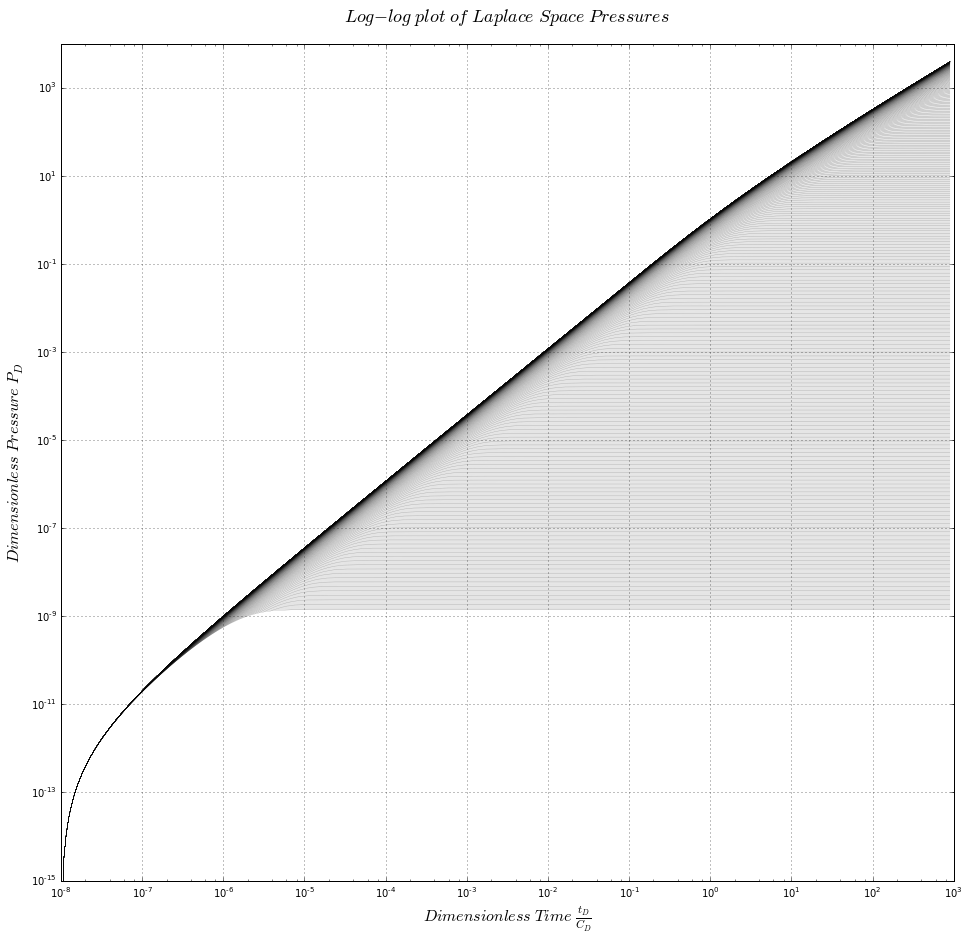

In [11]:
fig, ax = plt.subplots(figsize=(16,15))

ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)

ax.set_title(r'$Log-log \ plot \ of \ Laplace \ Space \ Pressures$', fontsize=18, y=1.02)

ax.set_xlabel(r'$Dimensionless \ Time \ \frac{t_{D}}{C_{D}}$', fontsize=16)
ax.set_ylabel(r'$Dimensionless \ Pressure \ P_{D}$', fontsize=16)

for integral in integrals:
    ax.plot(tDs, integral , color="black", linestyle='-', linewidth=0.1)

plt.grid()
plt.show()